In [1]:
#Read in /content/Mall_Customers.csv
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())

# Check the actual column names in the DataFrame
print(df.columns)

# Recode gender
df['gender'] = df['gender'].replace({'Female': 1, 'Male': 2})

print(df.head())


   customer_id  gender  age  annual_income_k  spending_score
0            1    Male   19               15              39
1            2    Male   21               15              81
2            3  Female   20               16               6
3            4  Female   23               16              77
4            5  Female   31               17              40
Index(['customer_id', 'gender', 'age', 'annual_income_k', 'spending_score'], dtype='object')
   customer_id  gender  age  annual_income_k  spending_score
0            1       2   19               15              39
1            2       2   21               15              81
2            3       1   20               16               6
3            4       1   23               16              77
4            5       1   31               17              40


/tmp/ipython-input-1-1849313711.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Female': 1, 'Male': 2})


Index(['customer_id', 'gender', 'age', 'annual_income_k', 'spending_score'], dtype='object')


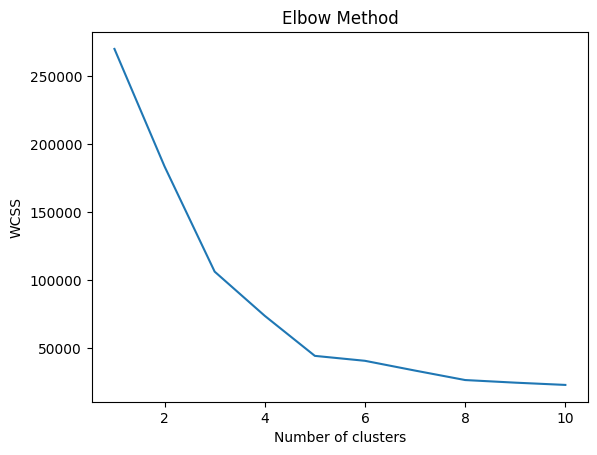

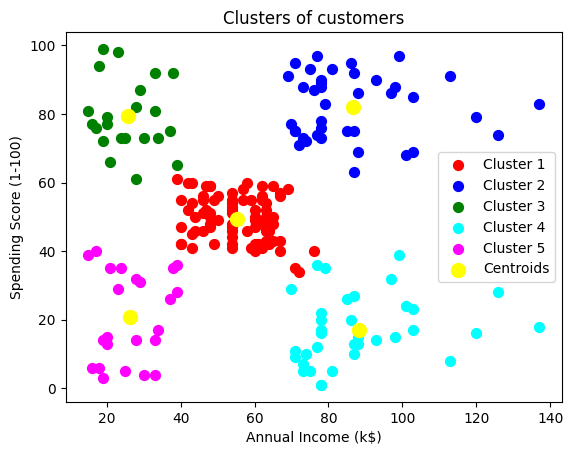

In [2]:
# K-means clustering and include a chart for gender and spending_score

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Print the actual column names to verify
print(df.columns)

# Access the columns using their actual names (e.g., annual_income_k', 'spending_score')
X = df[['annual_income_k', 'spending_score']]

# Determine optimal number of clusters using Elbow method
wcss = [ ]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply k-means clustering with the chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
